In [155]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading Data

In [156]:
# Load the dataset
df = pd.read_csv('./sustainable-energy.csv')

In [157]:
# Show datatypes and non-null counts per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [158]:
# Get Number of countries in dataframe
len(df['Entity'].unique())

176

In [159]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


We see that Density is not being correctly parsed as an number while the rest are all correct.

In [160]:
# get total NaNs by column -- There is quite alot :(
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

# Data Cleanup

### 1 -  We should remove any non-essential columns

In [161]:
# List of column names we are keeping in the df

# exclude any columns with nans > 350 since they reduce dataset too much

to_keep = ['Entity','Year', 'Access to electricity (% of population)',
           'Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)',
           'Electricity from renewables (TWh)','Land Area(Km2)','gdp_per_capita',
           'gdp_growth','Primary energy consumption per capita (kWh/person)',
           'Low-carbon electricity (% electricity)',
           'Access to clean fuels for cooking',
           'Density\\n(P/Km2)']
# slice the dataframe
df = df[to_keep]
df

,Entity,Year,Access to electricity (% of population),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Low-carbon electricity (% electricity),Access to clean fuels for cooking,Density\n(P/Km2)
0,Afghanistan,2000,1.613591,0.16,0.0,0.31,652230.0,NaN,NaN,302.59482,65.957440,6.2,60
1,Afghanistan,2001,4.074574,0.09,0.0,0.50,652230.0,NaN,NaN,236.89185,84.745766,7.2,60
2,Afghanistan,2002,9.409158,0.13,0.0,0.56,652230.0,179.426579,NaN,210.86215,81.159424,8.2,60
3,Afghanistan,2003,14.738506,0.31,0.0,0.63,652230.0,190.683814,8.832278,229.96822,67.021280,9.5,60
4,Afghanistan,2004,20.064968,0.33,0.0,0.56,652230.0,211.382074,1.414118,204.23125,62.921350,10.9,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,3.50,0.0,3.32,390757.0,1464.588957,0.755869,3227.68020,48.680350,29.8,38
3645,Zimbabwe,2017,44.178635,3.05,0.0,4.30,390757.0,1235.189032,4.709492,3068.01150,58.503407,29.8,38
3646,Zimbabwe,2018,45.572647,3.73,0.0,5.46,390757.0,1254.642265,4.824211,3441.98580,59.412407,29.9,38
3647,Zimbabwe,2019,46.781475,3.66,0.0,4.58,390757.0,1316.740657,-6.144236,3003.65530,55.582527,30.1,38


### 2 - Convert density to float as some of the values are malformed (i.e. '2,345' instead of '2345')

In [162]:
df["Density\\n(P/Km2)"]=df["Density\\n(P/Km2)"].map(lambda x: float(str(x).replace(',','')))
# should see density as an float now!
df["Density\\n(P/Km2)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3649 entries, 0 to 3648
Series name: Density\n(P/Km2)
Non-Null Count  Dtype  
--------------  -----  
3648 non-null   float64
dtypes: float64(1)
memory usage: 28.6 KB


### 3 - Cleanup the NaNs / Missing Data

In [163]:
# get total NaNs by column
df.isna().sum()

Entity                                                  0
Year                                                    0
Access to electricity (% of population)                10
Electricity from fossil fuels (TWh)                    21
Electricity from nuclear (TWh)                        126
Electricity from renewables (TWh)                      21
Land Area(Km2)                                          1
gdp_per_capita                                        282
gdp_growth                                            317
Primary energy consumption per capita (kWh/person)      0
Low-carbon electricity (% electricity)                 42
Access to clean fuels for cooking                     169
Density\n(P/Km2)                                        1
dtype: int64

In [164]:
# single record with a NaN area, lets just get rid of it
df.dropna(subset=['Land Area(Km2)'], inplace=True)

In [165]:
# list of features with nans
features_with_nans = df.columns[df.isna().any()].tolist()
features_with_nans

['Access to electricity (% of population)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'gdp_per_capita',
 'gdp_growth',
 'Low-carbon electricity (% electricity)',
 'Access to clean fuels for cooking']

In [166]:
# set of countries being dropped
to_drop = set()
for country in df['Entity'].unique():
  # filter dataset by rows/country
  rows = df.loc[df['Entity'] == country]
  # foreach feature with nans, see how many there are per country
  for feature in features_with_nans:
    nan_count = rows[feature].isna().sum()
    # remove any countries with more than 10 nans (50% of the data/ country)
    if nan_count > 10:
      to_drop.add(country)
      df.drop(df.index[df['Entity'] == country], inplace = True)

# log what we dropped
print(f"number_dropped:{len(to_drop)} | dropped: {list(to_drop)}")

# group rows by country
country_group = df.groupby(['Entity'])
for feature in features_with_nans:
  # replace nans with country mean
  df[feature] = country_group[feature].transform(lambda x: x.fillna(x.mean()))

number_dropped:27 | dropped: ['Saint Vincent and the Grenadines', 'Slovakia', 'Tuvalu', 'Saint Kitts and Nevis', 'Djibouti', 'Libya', 'Indonesia', 'Gambia', 'Malaysia', 'Aruba', 'Saint Lucia', 'Cayman Islands', 'Bahamas', 'Bulgaria', 'Yemen', 'Egypt', 'Kazakhstan', 'Chile', 'Somalia', 'Saudi Arabia', 'New Caledonia', 'Lebanon', 'Kyrgyzstan', 'Congo', 'Bermuda', 'Puerto Rico', 'Czechia']


In [167]:
# all nans are now gone :)
df.isna().sum()

Entity                                                0
Year                                                  0
Access to electricity (% of population)               0
Electricity from fossil fuels (TWh)                   0
Electricity from nuclear (TWh)                        0
Electricity from renewables (TWh)                     0
Land Area(Km2)                                        0
gdp_per_capita                                        0
gdp_growth                                            0
Primary energy consumption per capita (kWh/person)    0
Low-carbon electricity (% electricity)                0
Access to clean fuels for cooking                     0
Density\n(P/Km2)                                      0
dtype: int64

In [168]:
# Get Number of countries in dataframe after cleaning
len(df['Entity'].unique())

148

### 4 - Calculating % renewable

In [169]:
df['RenewableUsagePercentage'] = df['Low-carbon electricity (% electricity)']
df = df.drop(['Electricity from renewables (TWh)','Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)'], axis=1)
df

,Entity,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Low-carbon electricity (% electricity),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
0,Afghanistan,2000,1.613591,652230.0,439.055765,6.163893,302.59482,65.957440,6.2,60.0,65.957440
1,Afghanistan,2001,4.074574,652230.0,439.055765,6.163893,236.89185,84.745766,7.2,60.0,84.745766
2,Afghanistan,2002,9.409158,652230.0,179.426579,6.163893,210.86215,81.159424,8.2,60.0,81.159424
3,Afghanistan,2003,14.738506,652230.0,190.683814,8.832278,229.96822,67.021280,9.5,60.0,67.021280
4,Afghanistan,2004,20.064968,652230.0,211.382074,1.414118,204.23125,62.921350,10.9,60.0,62.921350
...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,390757.0,1464.588957,0.755869,3227.68020,48.680350,29.8,38.0,48.680350
3645,Zimbabwe,2017,44.178635,390757.0,1235.189032,4.709492,3068.01150,58.503407,29.8,38.0,58.503407
3646,Zimbabwe,2018,45.572647,390757.0,1254.642265,4.824211,3441.98580,59.412407,29.9,38.0,59.412407
3647,Zimbabwe,2019,46.781475,390757.0,1316.740657,-6.144236,3003.65530,55.582527,30.1,38.0,55.582527


In [170]:
df.drop('Low-carbon electricity (% electricity)', axis=1, inplace=True)
df

,Entity,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
0,Afghanistan,2000,1.613591,652230.0,439.055765,6.163893,302.59482,6.2,60.0,65.957440
1,Afghanistan,2001,4.074574,652230.0,439.055765,6.163893,236.89185,7.2,60.0,84.745766
2,Afghanistan,2002,9.409158,652230.0,179.426579,6.163893,210.86215,8.2,60.0,81.159424
3,Afghanistan,2003,14.738506,652230.0,190.683814,8.832278,229.96822,9.5,60.0,67.021280
4,Afghanistan,2004,20.064968,652230.0,211.382074,1.414118,204.23125,10.9,60.0,62.921350
...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,390757.0,1464.588957,0.755869,3227.68020,29.8,38.0,48.680350
3645,Zimbabwe,2017,44.178635,390757.0,1235.189032,4.709492,3068.01150,29.8,38.0,58.503407
3646,Zimbabwe,2018,45.572647,390757.0,1254.642265,4.824211,3441.98580,29.9,38.0,59.412407
3647,Zimbabwe,2019,46.781475,390757.0,1316.740657,-6.144236,3003.65530,30.1,38.0,55.582527


### 5 - Label Encoding (Label Encoding)

In [171]:
le = LabelEncoder()
dflabel=df
dflabel['Entity'] = le.fit_transform(dflabel['Entity'].values)

In [172]:
dflabel['Entity']

0         0
1         0
2         0
3         0
4         0
       ... 
3644    147
3645    147
3646    147
3647    147
3648    147
Name: Entity, Length: 3081, dtype: int32

### 6 - Label Encoding (One Hot Encoding)

In [174]:
# get number of columns excluding country column
num_cols = len(df.columns) -1
# convert countries to one hot representation
countries = pd.get_dummies(df['Entity'], prefix='Country')
# join new columns and remove old country column
df = df.join(countries)
df.drop(["Entity"], axis=1,inplace=True)

# Data Analysis

In [175]:
# get stats on only first set of columns as rest are country columns
df_no_country= df.iloc[:,:num_cols]
df_no_country.describe()

,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
count,3081.000000,3081.000000,3.081000e+03,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,2010.048685,76.988327,6.497911e+05,12506.750471,3.488292,25783.603535,62.456118,226.854917,39.894408
std,6.052280,31.488840,1.687345e+06,18653.847464,5.126907,36743.264171,39.137018,734.374358,34.570516
min,2000.000000,1.252269,2.100000e+01,111.927225,-36.658153,105.110120,0.000000,2.000000,0.000000
25%,2005.000000,54.002895,2.974300e+04,1241.825298,1.448323,2771.765400,22.300000,35.000000,6.268657
50%,2010.000000,97.516205,1.319570e+05,4230.171266,3.577015,12061.231000,81.900000,84.000000,34.862385
75%,2015.000000,100.000000,4.881000e+05,14485.386120,5.852518,30816.120000,100.000000,206.000000,67.567566
max,2020.000000,100.000000,9.984670e+06,123514.196700,63.379875,262585.700000,100.000000,8358.000000,100.000010


In [176]:
df_no_country.corr()

,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
Year,1.000000,0.137952,-0.001891,0.130554,-0.214863,0.001893,0.070042,-0.001891,0.035051
Access to electricity (% of population),0.137952,1.000000,0.075124,0.436276,-0.112533,0.455423,0.871971,0.097800,-0.138423
Land Area(Km2),-0.001891,0.075124,1.000000,0.113086,0.018078,0.117005,0.083839,-0.081412,0.043088
gdp_per_capita,0.130554,0.436276,0.113086,1.000000,-0.124352,0.707147,0.550093,0.151584,0.031284
gdp_growth,-0.214863,-0.112533,0.018078,-0.124352,1.000000,-0.031897,-0.143766,0.024256,-0.021725
Primary energy consumption per capita (kWh/person),0.001893,0.455423,0.117005,0.707147,-0.031897,1.000000,0.556611,0.315386,-0.126009
Access to clean fuels for cooking,0.070042,0.871971,0.083839,0.550093,-0.143766,0.556611,1.000000,0.107763,-0.128939
Density\n(P/Km2),-0.001891,0.097800,-0.081412,0.151584,0.024256,0.315386,0.107763,1.000000,-0.189370
RenewableUsagePercentage,0.035051,-0.138423,0.043088,0.031284,-0.021725,-0.126009,-0.128939,-0.189370,1.000000


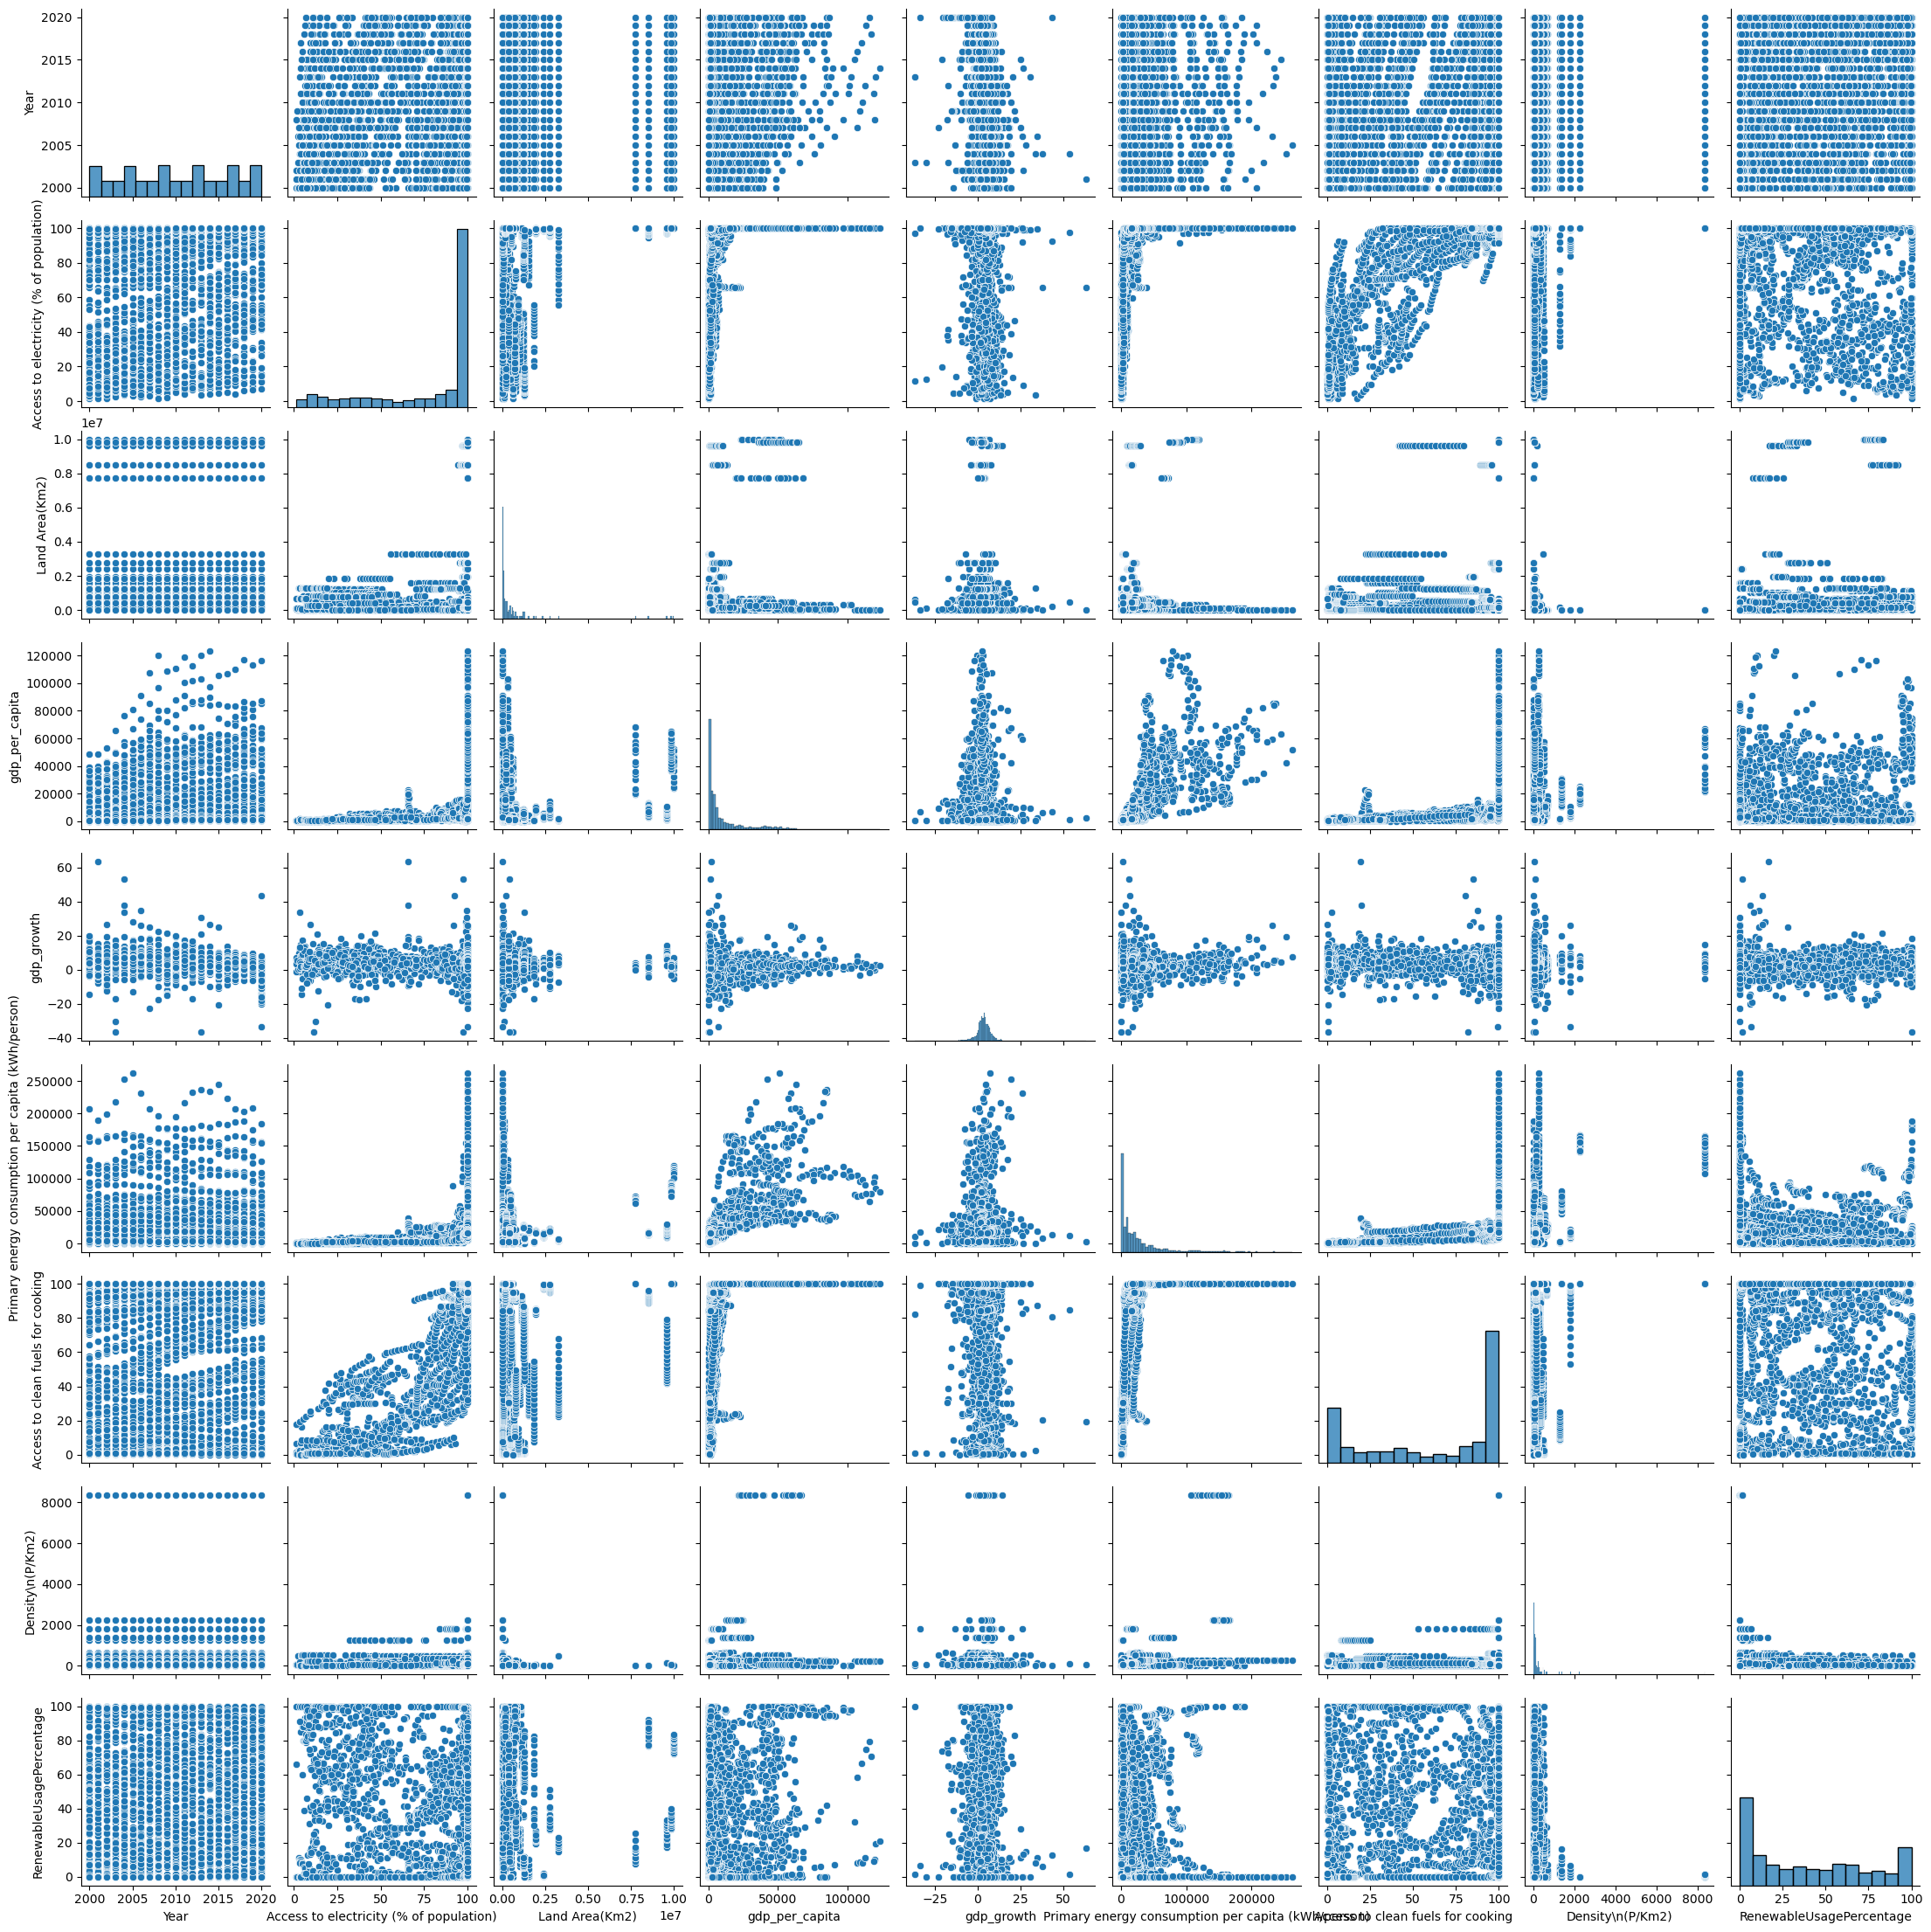

In [117]:
# Make a pairplot between all features to look for trends
sns.pairplot(data=df_no_country)

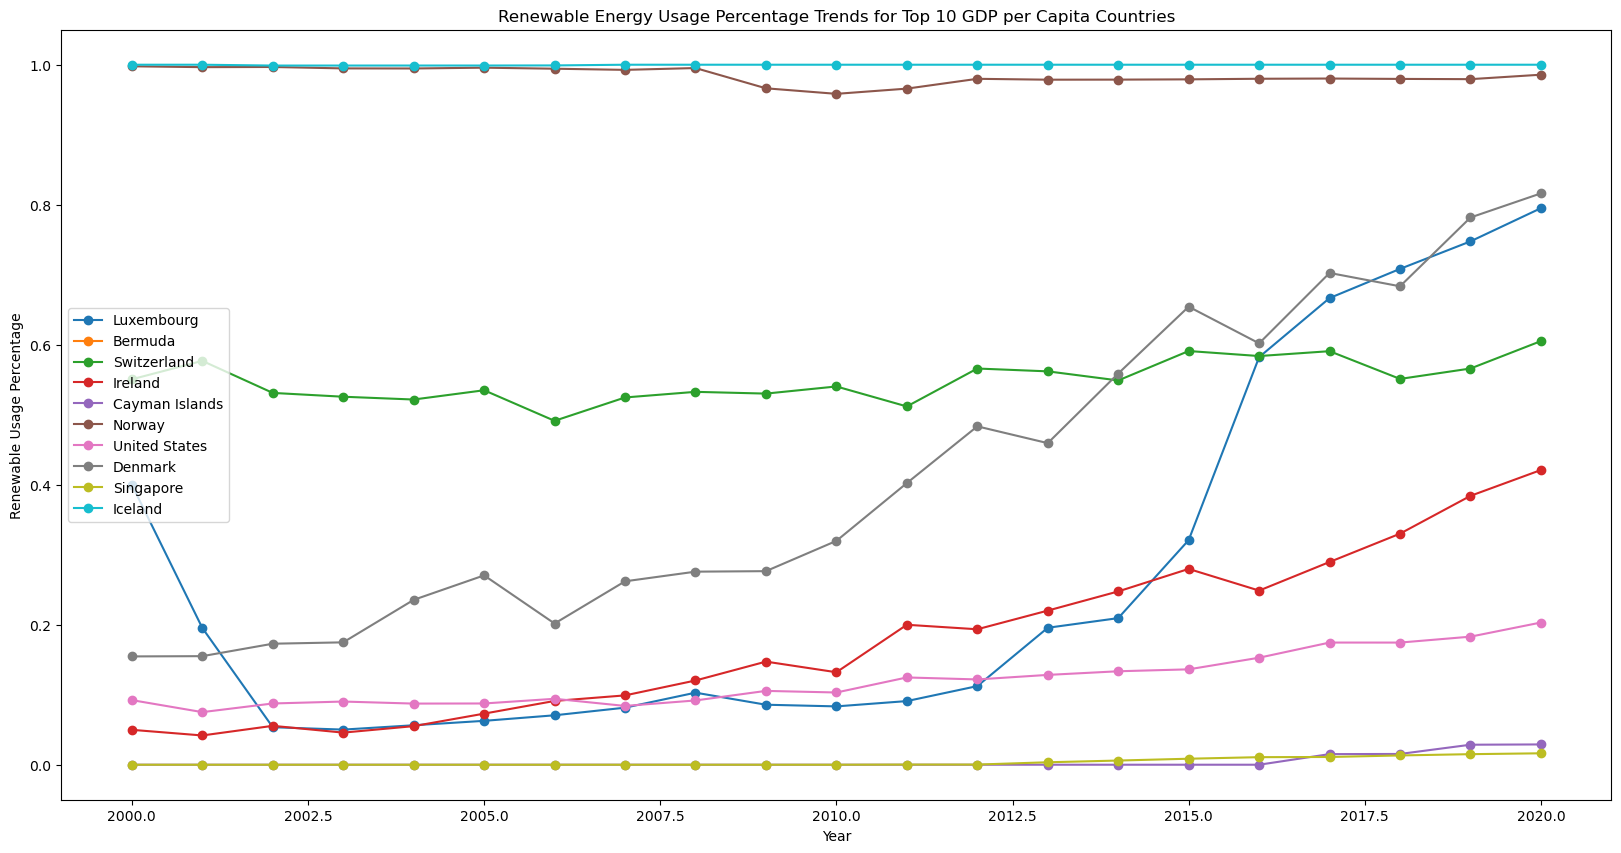

In [118]:
df2 = pd.read_csv('sustainable-energy.csv')
df2['RenewableUsagePercentage'] = df2['Electricity from renewables (TWh)'] / (
    df2['Electricity from renewables (TWh)'] +
    df2['Electricity from nuclear (TWh)'] +
    df2['Electricity from fossil fuels (TWh)'])

most_recent_year = df2['Year'].max()

df_recent = df2[df2['Year'] == most_recent_year]
top_10_gdp_countries = df_recent.sort_values(by='gdp_per_capita', ascending=False).head(10)['Entity'].unique()

df_top_10_gdp = df2[df2['Entity'].isin(top_10_gdp_countries)]

plt.figure(figsize=(20, 10))
for country in top_10_gdp_countries:
    country_data = df_top_10_gdp[df_top_10_gdp['Entity'] == country]
    plt.plot(country_data['Year'], country_data['RenewableUsagePercentage'], label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('Renewable Usage Percentage')
plt.title('Renewable Energy Usage Percentage Trends for Top 10 GDP per Capita Countries')
plt.legend()
plt.show()

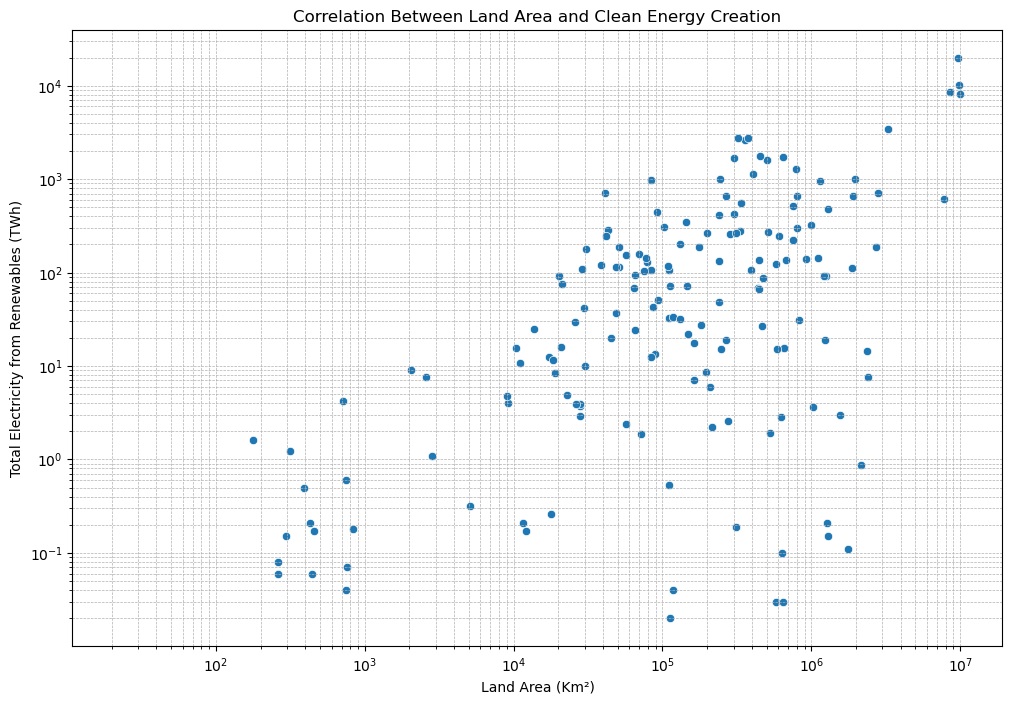

In [119]:
clean_energy_sum = df2.groupby('Entity').agg({
    'Electricity from renewables (TWh)': 'sum', 
    'Land Area(Km2)': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=clean_energy_sum, x='Land Area(Km2)', y='Electricity from renewables (TWh)', legend=False)
plt.xlabel('Land Area (Km²)')
plt.ylabel('Total Electricity from Renewables (TWh)')
plt.title('Correlation Between Land Area and Clean Energy Creation')
plt.xscale('log')
plt.yscale('log') 
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Model and Feature Selection

### Lasso Regression

In [177]:
X = df.drop(columns='RenewableUsagePercentage')
y = df['RenewableUsagePercentage']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features to a range between 0 and 1
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the LassoCV regressor to search for the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)

# Fit the model to the training data
lasso_cv.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso_cv.predict(X_test)

# Calculate the R-squared and Mean Squared Error
r2_score_value = r2_score(y_test, y_pred)
mse_value = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Extract the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})

# Output the results
print(f'Best alpha: {lasso_cv.alpha_}')
print(f'R-squared: {r2_score_value}')
print(f'MSE: {mse_value}')
print(f'Mean Absolute Error: {mae}')
print(coefficients)

Best alpha: 0.0018307382802953678
R-squared: 0.942389507766518
MSE: 70.7326951011318
Mean Absolute Error: 5.400867728346762
                                     Feature  Coefficient
0                                       Year     3.763127
1    Access to electricity (% of population)    -0.000000
2                             Land Area(Km2)     0.000000
3                             gdp_per_capita    15.028894
4                                 gdp_growth    -3.942986
..                                       ...          ...
151                              Country_143    46.271814
152                              Country_144   -21.247951
153                              Country_145   -29.165143
154                              Country_146    57.344135
155                              Country_147    22.526685

[156 rows x 2 columns]


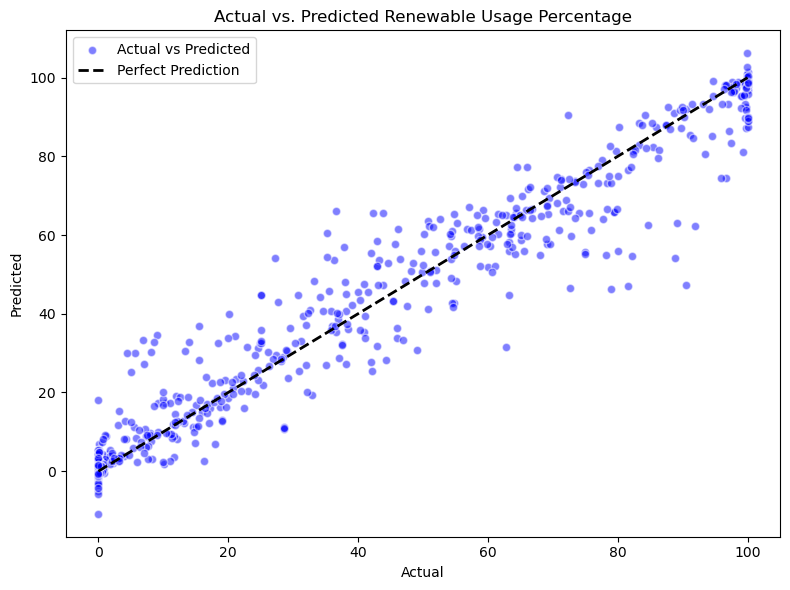

In [178]:
# Scatter Plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='w', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Renewable Usage Percentage')
plt.legend()
plt.tight_layout()
plt.show()

### Forward Stepwise Selection Random Forest

In [179]:
X = dflabel.drop('RenewableUsagePercentage', axis=1)
y = dflabel['RenewableUsagePercentage']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
forward_feature_selection = SequentialFeatureSelector(RandomForestRegressor(n_jobs=-1),
                                                     k_features = 9,
                                                     forward = True,
                                                     floating = False,
                                                     verbose = 2,
                                                     scoring = "r2",
                                                     cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.9s finished

[2024-03-25 13:43:48] Features: 1/9 -- score: 0.9267233769942911[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.2s finished

[2024-03-25 13:43:53] Features: 2/9 -- score: 0.9694949494933323[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.2s finished

[2024-03-25 13:43:58] Features: 3/9 -- score: 0.9727253382302219[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [182]:
dflabel

,Entity,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
0,0,2000,1.613591,652230.0,439.055765,6.163893,302.59482,6.2,60.0,65.957440
1,0,2001,4.074574,652230.0,439.055765,6.163893,236.89185,7.2,60.0,84.745766
2,0,2002,9.409158,652230.0,179.426579,6.163893,210.86215,8.2,60.0,81.159424
3,0,2003,14.738506,652230.0,190.683814,8.832278,229.96822,9.5,60.0,67.021280
4,0,2004,20.064968,652230.0,211.382074,1.414118,204.23125,10.9,60.0,62.921350
...,...,...,...,...,...,...,...,...,...,...
3644,147,2016,42.561730,390757.0,1464.588957,0.755869,3227.68020,29.8,38.0,48.680350
3645,147,2017,44.178635,390757.0,1235.189032,4.709492,3068.01150,29.8,38.0,58.503407
3646,147,2018,45.572647,390757.0,1254.642265,4.824211,3441.98580,29.9,38.0,59.412407
3647,147,2019,46.781475,390757.0,1316.740657,-6.144236,3003.65530,30.1,38.0,55.582527


In [183]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.9208750055133541, 0.927843306864146, 0.9247...",0.926723,"(Entity,)",0.008827,0.006867,0.003434
2,"(0, 1)","[0.9733128610601545, 0.9721092103400627, 0.973...",0.969495,"(Entity, Year)",0.005887,0.00458,0.00229
3,"(0, 1, 8)","[0.9770516146303169, 0.9776923494481872, 0.972...",0.972725,"(Entity, Year, Density\n(P/Km2))",0.006789,0.005282,0.002641
4,"(0, 1, 3, 8)","[0.9755070930977111, 0.9742019121072198, 0.970...",0.971648,"(Entity, Year, Land Area(Km2), Density\n(P/Km2))",0.004246,0.003304,0.001652
5,"(0, 1, 3, 7, 8)","[0.9717443542823325, 0.9748637441380431, 0.968...",0.970077,"(Entity, Year, Land Area(Km2), Access to clean...",0.003769,0.002932,0.001466
6,"(0, 1, 3, 6, 7, 8)","[0.9662866320196752, 0.9732242864587656, 0.963...",0.966468,"(Entity, Year, Land Area(Km2), Primary energy ...",0.006148,0.004783,0.002392
7,"(0, 1, 2, 3, 6, 7, 8)","[0.9644544830817264, 0.9724468839812713, 0.964...",0.965524,"(Entity, Year, Access to electricity (% of pop...",0.005606,0.004362,0.002181
8,"(0, 1, 2, 3, 4, 6, 7, 8)","[0.9565491876204106, 0.9669463686308734, 0.962...",0.963153,"(Entity, Year, Access to electricity (% of pop...",0.004821,0.003751,0.001876
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.9549231209724949, 0.9648865177429287, 0.959...",0.96042,"(Entity, Year, Access to electricity (% of pop...",0.004657,0.003624,0.001812


In [184]:
rf = RandomForestRegressor()

X_train_transformed = forward_feature_selection.transform(X_train)
rf.fit(X_train_transformed, y_train)

X_test_transformed = forward_feature_selection.transform(X_test)
y_pred = rf.predict(X_test_transformed)

# Calculate Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 29.501518763180076
Mean Absolute Error: 3.3491033731125874


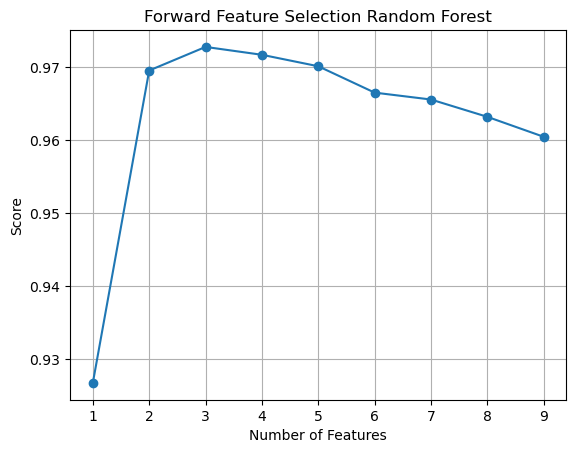

In [185]:
fig, ax = plt.subplots()

scores = [forward_feature_selection.subsets_[k]['avg_score'] for k in forward_feature_selection.subsets_.keys()]

num_features = [len(forward_feature_selection.subsets_[k]['feature_idx']) for k in forward_feature_selection.subsets_.keys()]

ax.plot(num_features, scores, marker='o')
ax.set_xlabel("Number of Features")
ax.set_ylabel("Score")
ax.set_title("Forward Feature Selection Random Forest")
ax.grid(True)

plt.show()

### Forward Stepwise Selection XGBoost

In [186]:
forward_feature_selection_xg = SequentialFeatureSelector(XGBRegressor(n_jobs=-1), 
                                                      k_features=9,
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring="r2",
                                                      cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s finished

[2024-03-25 13:44:45] Features: 1/9 -- score: 0.9267381740859444[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.7s finished

[2024-03-25 13:44:47] Features: 2/9 -- score: 0.9606249877181279[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s finished

[2024-03-25 13:44:49] Features: 3/9 -- score: 0.9693717370997371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [187]:
pd.DataFrame.from_dict(forward_feature_selection_xg.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9209186355033449, 0.9272451601469247, 0.925...",0.926738,"(Land Area(Km2),)",0.008175,0.00636,0.00318
2,"(1, 3)","[0.9636674702558373, 0.9664558697738085, 0.966...",0.960625,"(Year, Land Area(Km2))",0.010178,0.007919,0.00396
3,"(0, 1, 3)","[0.9744536385008719, 0.9740122104304508, 0.968...",0.969372,"(Entity, Year, Land Area(Km2))",0.005846,0.004549,0.002274
4,"(0, 1, 3, 8)","[0.9748753900951302, 0.967657579084315, 0.9682...",0.968455,"(Entity, Year, Land Area(Km2), Density\n(P/Km2))",0.004901,0.003813,0.001907
5,"(0, 1, 3, 7, 8)","[0.9707338561261545, 0.9685877018084353, 0.965...",0.966783,"(Entity, Year, Land Area(Km2), Access to clean...",0.003167,0.002464,0.001232
6,"(0, 1, 2, 3, 7, 8)","[0.9670909188849008, 0.9654361375526144, 0.959...",0.963928,"(Entity, Year, Access to electricity (% of pop...",0.003412,0.002655,0.001327
7,"(0, 1, 2, 3, 6, 7, 8)","[0.9622179997912029, 0.9647272327468799, 0.959...",0.961939,"(Entity, Year, Access to electricity (% of pop...",0.00266,0.002069,0.001035
8,"(0, 1, 2, 3, 4, 6, 7, 8)","[0.9555075157895717, 0.9669267661386081, 0.957...",0.960065,"(Entity, Year, Access to electricity (% of pop...",0.005351,0.004163,0.002082
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.952229925400411, 0.9584126497225763, 0.9421...",0.955534,"(Entity, Year, Access to electricity (% of pop...",0.009926,0.007723,0.003861


In [188]:
X_train_transformed = forward_feature_selection_xg.transform(X_train)
rf.fit(X_train_transformed, y_train)

X_test_transformed = forward_feature_selection_xg.transform(X_test)
y_pred = rf.predict(X_test_transformed)

# Calculate Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 30.171577535134585
Mean Absolute Error: 3.2937138736261824


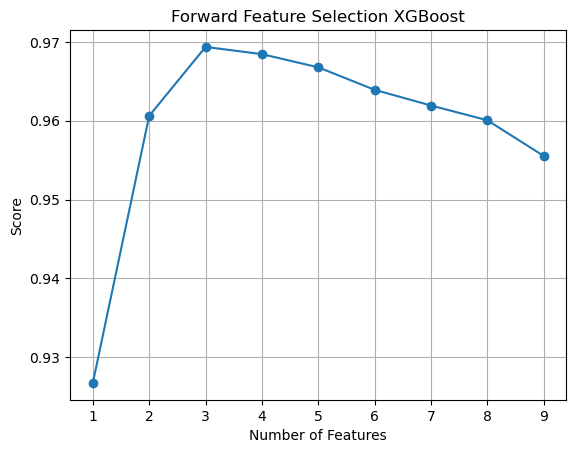

In [132]:
# Plotting
fig, ax = plt.subplots()

# Scores of the selected subsets
scores = [forward_feature_selection_xg.subsets_[k]['avg_score'] for k in forward_feature_selection_xg.subsets_.keys()]

# Number of features for each score
num_features = [len(forward_feature_selection_xg.subsets_[k]['feature_idx']) for k in forward_feature_selection_xg.subsets_.keys()]

ax.plot(num_features, scores, marker='o')
ax.set_xlabel("Number of Features")
ax.set_ylabel("Score")
ax.set_title("Forward Feature Selection XGBoost")
ax.grid(True)

plt.show()

### Linear Regression

MAE: 37.696984087676356
MSE:  2583.3075417889972
R2: -1.1825598511000934


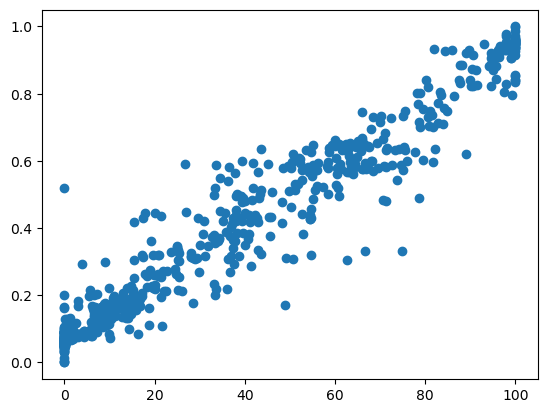

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from math import exp

output = "RenewableUsagePercentage"
y= df[output]
X = df.drop(output, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=125, stratify=df['Year'])

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
# apply min-max scaler to bound percentages
pred = (predictions - predictions.min(axis=0)) / (predictions.max(axis=0) - predictions.min(axis=0))

# print performance scores
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("R2:", r2_score(y_test,pred ))
plt.scatter(y_test, pred)

### Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mean Squared Error: 33.1211807396829
Mean Absolute Error: 3.341415573282279
R-squared: 0.9720168976654634


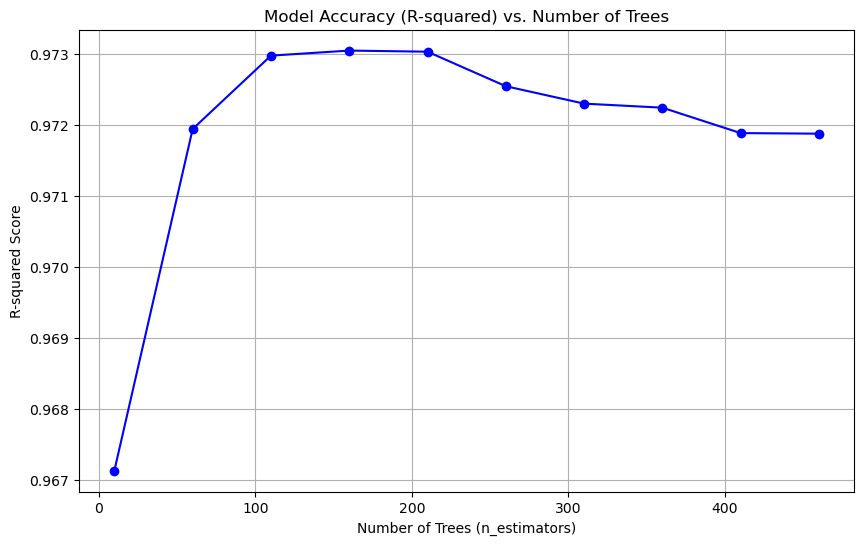

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Optimal parameters found from grid search, except n_estimators
optimal_params = {
    'max_depth': 30,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

# Define a range of `n_estimators` to explore
n_estimators_range = np.arange(10, 501, 50)

# List to store R-squared scores for each model
r_squared_scores = []

# Iterate over the range of `n_estimators`, fitting a model each time
for n_estimators in n_estimators_range:
    # Create and fit the RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=n_estimators, **optimal_params, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set and calculate R-squared
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)

    r_squared_scores.append(r_squared)

# Plot R-squared vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r_squared_scores, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy (R-squared) vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()

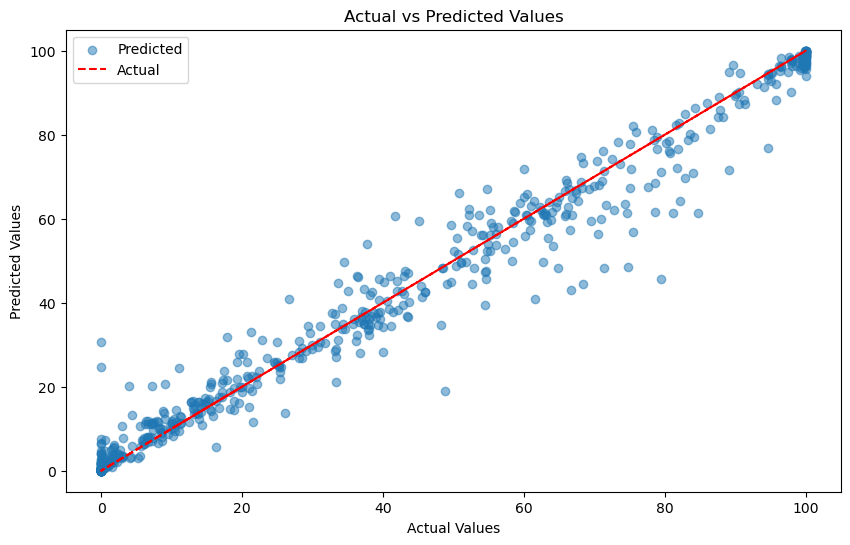

In [136]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted')
plt.plot(y_test, y_test, 'r--', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

### XGBoost

In [137]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost regressor and parameter grid
xgb_model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator after the grid search
best_xgb_model = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best mean squared error from GridSearch: {-grid_search.best_score_}")
print(f"Mean Squared Error on test set: {mse}")
print(f'Mean Absolute Error: {mae}')
print(f"R-squared on test set: {r_squared}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best mean squared error from GridSearch: 46.1348308506363
Mean Squared Error on test set: 32.37973538860715
Mean Absolute Error: 3.614774645876983
R-squared on test set: 0.9726433228312112


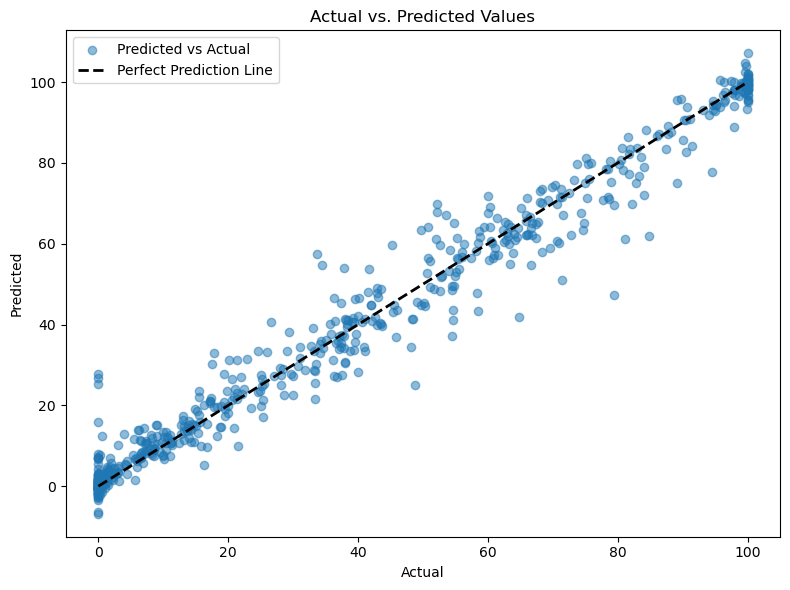

In [138]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

### Model Usage

In [189]:
X = dflabel.drop('RenewableUsagePercentage', axis=1)
y = dflabel['RenewableUsagePercentage']

In [190]:
print(X_train.columns)
print(X_test.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Land Area(Km2)', 'gdp_per_capita', 'gdp_growth',
       'Primary energy consumption per capita (kWh/person)',
       'Access to clean fuels for cooking', 'Density\n(P/Km2)'],
      dtype='object')
Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Land Area(Km2)', 'gdp_per_capita', 'gdp_growth',
       'Primary energy consumption per capita (kWh/person)',
       'Access to clean fuels for cooking', 'Density\n(P/Km2)'],
      dtype='object')


In [191]:
selected_features = ['Entity', 'Year', 'Density\\n(P/Km2)'] 

# Select the desired features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the Random Forest Regressor
rf_selected = RandomForestRegressor(n_jobs=-1)

# Train the Random Forest Regressor
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_selected.predict(X_test_selected)

# Calculate Mean Squared Error and Mean Absolute Error
mse_selected = mean_squared_error(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
r2_test_selected = rf_selected.score(X_test_selected, y_test)

# Print out the performance
print(f'Selected Features Mean Squared Error: {mse_selected}')
print(f'Selected Features Mean Absolute Error: {mae_selected}')
print(f'Selected Features Test R-squared: {r2_test_selected}')

Selected Features Mean Squared Error: 25.543952958191518
Selected Features Mean Absolute Error: 2.6898616297945015
Selected Features Test R-squared: 0.9791949154290492


In [192]:
original_values = le.classes_
label_mapping = {index: label for index, label in enumerate(original_values)}
print(label_mapping)

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Angola', 4: 'Antigua and Barbuda', 5: 'Argentina', 6: 'Armenia', 7: 'Australia', 8: 'Austria', 9: 'Azerbaijan', 10: 'Bahrain', 11: 'Bangladesh', 12: 'Barbados', 13: 'Belarus', 14: 'Belgium', 15: 'Belize', 16: 'Benin', 17: 'Bhutan', 18: 'Bosnia and Herzegovina', 19: 'Botswana', 20: 'Brazil', 21: 'Burkina Faso', 22: 'Burundi', 23: 'Cambodia', 24: 'Cameroon', 25: 'Canada', 26: 'Central African Republic', 27: 'Chad', 28: 'China', 29: 'Colombia', 30: 'Comoros', 31: 'Costa Rica', 32: 'Croatia', 33: 'Cuba', 34: 'Cyprus', 35: 'Denmark', 36: 'Dominica', 37: 'Dominican Republic', 38: 'Ecuador', 39: 'El Salvador', 40: 'Equatorial Guinea', 41: 'Eritrea', 42: 'Estonia', 43: 'Eswatini', 44: 'Ethiopia', 45: 'Fiji', 46: 'Finland', 47: 'France', 48: 'Gabon', 49: 'Georgia', 50: 'Germany', 51: 'Ghana', 52: 'Greece', 53: 'Grenada', 54: 'Guatemala', 55: 'Guinea', 56: 'Guinea-Bissau', 57: 'Guyana', 58: 'Haiti', 59: 'Honduras', 60: 'Hungary', 61: 'Iceland', 

In [193]:
filtered_rows = dflabel[dflabel['Entity'] == 143]
filtered_rows

,Entity,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
3523,143,2000,97.676865,176215.0,6875.025469,-1.929931,14601.4690,100.0,20.0,93.457950
3524,143,2001,97.785390,176215.0,6284.459680,-3.844130,15946.6080,100.0,20.0,99.344986
3525,143,2002,97.886330,176215.0,4090.891888,-7.732007,14137.8040,100.0,20.0,99.263920
3526,143,2003,97.982040,176215.0,3624.205685,0.805284,14181.1470,100.0,20.0,99.062130
3527,143,2004,98.074860,176215.0,4120.544205,5.004160,13627.5250,100.0,20.0,82.525950
3528,143,2005,98.167145,176215.0,5226.944100,7.460132,14696.3900,100.0,20.0,88.095240
3529,143,2006,98.505424,176215.0,5887.845162,4.098577,13377.3125,100.0,20.0,65.813530
3530,143,2007,98.692635,176215.0,7026.503055,6.541511,15803.4530,100.0,20.0,89.547424
3531,143,2008,98.784355,176215.0,9091.079039,7.176145,16750.0700,100.0,20.0,64.629845
3532,143,2009,99.100000,176215.0,9451.932449,4.243494,17655.9450,100.0,20.0,69.090904


In [202]:
new_data = pd.DataFrame({
    'Entity': [143],
    'Year': [2021],
    'Density\\n(P/Km2)': [20]
})
new_predictions = rf_selected.predict(new_data)
print(new_predictions)

[83.8665348]


In [201]:
dflabel

,Entity,Year,Access to electricity (% of population),Land Area(Km2),gdp_per_capita,gdp_growth,Primary energy consumption per capita (kWh/person),Access to clean fuels for cooking,Density\n(P/Km2),RenewableUsagePercentage
0,0,2000,1.613591,652230.0,439.055765,6.163893,302.59482,6.2,60.0,65.957440
1,0,2001,4.074574,652230.0,439.055765,6.163893,236.89185,7.2,60.0,84.745766
2,0,2002,9.409158,652230.0,179.426579,6.163893,210.86215,8.2,60.0,81.159424
3,0,2003,14.738506,652230.0,190.683814,8.832278,229.96822,9.5,60.0,67.021280
4,0,2004,20.064968,652230.0,211.382074,1.414118,204.23125,10.9,60.0,62.921350
...,...,...,...,...,...,...,...,...,...,...
3644,147,2016,42.561730,390757.0,1464.588957,0.755869,3227.68020,29.8,38.0,48.680350
3645,147,2017,44.178635,390757.0,1235.189032,4.709492,3068.01150,29.8,38.0,58.503407
3646,147,2018,45.572647,390757.0,1254.642265,4.824211,3441.98580,29.9,38.0,59.412407
3647,147,2019,46.781475,390757.0,1316.740657,-6.144236,3003.65530,30.1,38.0,55.582527
